## EcodeCamp Software Company
## Name : Sheema Masood 
## Data Science Internship
### AUGUST 2024 TO SEPTEMBER 2024
--------------------------------------------------------------------------------------------------------------------------------------------------------

## Task 2 : EDA on Titanic Survival predictions
### Objective : develop a predictive model to determine the survival likelihood of passangers on Titanic

### Task Roadmap:
    1.	Data Collection:
            -	Use the Titanic dataset from Kaggle.
            -	Understand the features and target variable.
    2.	Data Preprocessing:
            -	Handle missing values.
            -	Perform feature engineering (e.g., creating new features like family size).
            -	Encode categorical variables.
    3.	Model Buil- ding:
            -	Split the data into training and testing sets.
            -	Train multiple models (Logistic Regression, Decision Trees, Random Forest etc.).
            -	Evaluate and select the best-performing model.
    4.	Model Deployment:
            -	Deploy the model using Flask or Django.
            - 	Create a user interface to input passenger details and predict survival.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### import & analyze data set

In [2]:
#import data set
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Data Preprocessing
### Steps to follow:
   - Handling Missing Values:

       - Identify Missing Values:
                 Use isnull() and sum() functions to find missing values in each column.

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

### Handle Missing Values:
     - Age: Since age is an important feature, we can fill missing values using the median or mean of the column.
     - Embarked: If missing, we can fill it with the mode (most frequent value).
     - deck : we can remove deck column because it has more than 50% null values.

In [10]:
df.drop('deck', axis= 1, inplace = True)

In [11]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
54,0,1,male,65.00,0,1,61.9792,C,First,man,True,Cherbourg,no,False
319,1,1,female,40.00,1,1,134.5000,C,First,woman,False,Cherbourg,yes,False


### Impute the missing values in age , embarked , and embark_town columns

In [12]:
df['age'].mean()

29.69911764705882

In [13]:
df.age.median()

28.0

In [14]:
df['age'] = df['age'].fillna(df['age'].median())

In [15]:
df.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [16]:
df.embark_town.mode()[0]

'Southampton'

In [17]:
# checking the values , which is most repeated
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [18]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [19]:
df.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
572,1,1,male,36.0,0,0,26.3875,S,First,man,True,Southampton,yes,True
312,0,2,female,26.0,1,1,26.0000,S,Second,woman,False,Southampton,no,False


In [20]:
# making sure that our data is free from null values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Data visualization

In [21]:
# Group by 'Sex' and 'Survived' columns and count the occurrences

gender_survival_counts = df.groupby(['sex', 'survived']).size().unstack()

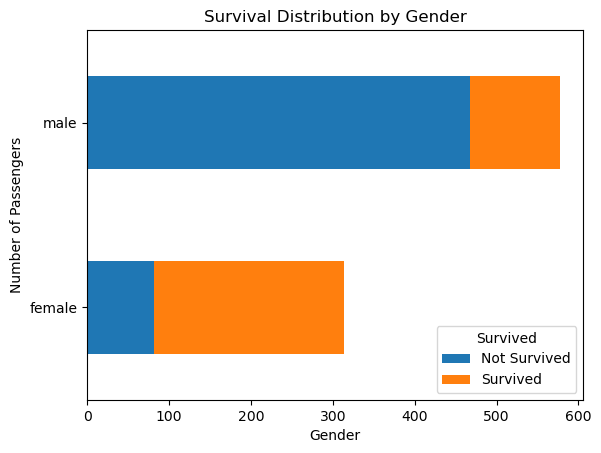

In [22]:
# Plotting the bar chart
gender_survival_counts.plot(kind='barh', stacked=True)

# Adding titles and labels
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.savefig('Survival Distribution by Gender.png')

# Show plot
plt.show()

### number of females were survived more than men

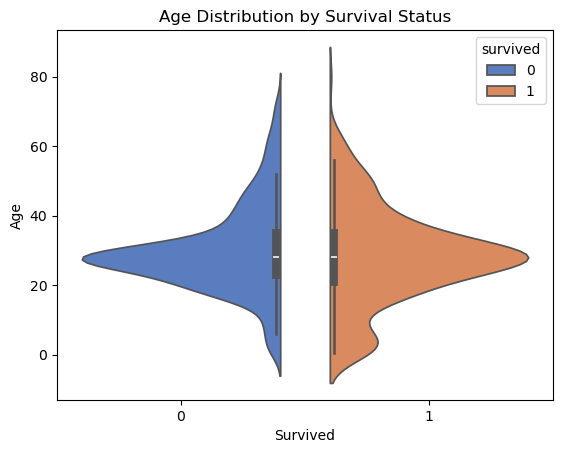

In [23]:
# Create a violin plot for age distribution
sns.violinplot(data=df, x='survived', y='age', hue='survived', split=True, palette='muted')

# Adding titles and labels
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.savefig('Age Distribution by Survival Status.png')

plt.show()

#### in this plot, it might be observed that younger individuals had a higher survival rate, as indicated by the differences in the shape and central tendency of the violins.

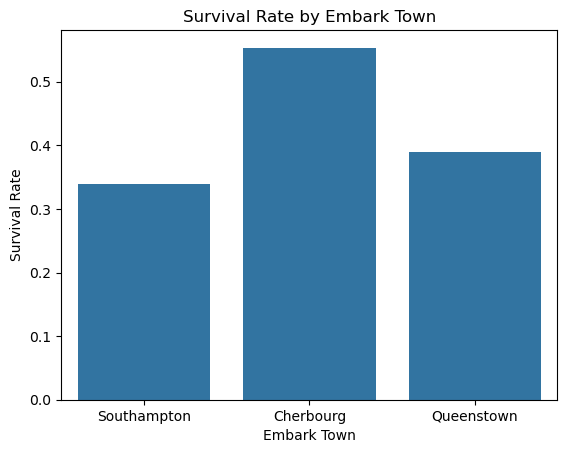

In [25]:
# Plot survival rate by embark town
sns.barplot(data=df, x='embark_town', y='survived', estimator=lambda x: sum(x)/len(x), errorbar=None)

# Adding titles and labels
plt.title('Survival Rate by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Survival Rate')
plt.savefig('Survival Rate by Embark Town.png')

plt.show()

#### most of the people frpm cherbourg were survived

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


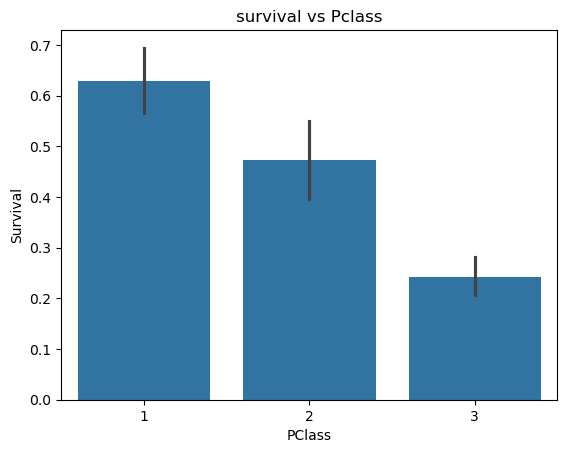

In [27]:
#draw a bar plot of survival by Pclass
sns.barplot(x="pclass", y="survived", data=df)
plt.xlabel('PClass')
plt.ylabel('Survival')
plt.title('survival vs Pclass')
plt.savefig('Survuval Vs Pclass')

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["survived"][df["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["survived"][df["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["survived"][df["pclass"] == 3].value_counts(normalize = True)[1]*100)

### people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

## Feature Engineering:

### Create New Features:
      - FamilySize: Combining SibSp and Parch to create a new feature that indicates family size.
           -  Purpose: Represents the total number of family members a passenger had on board, including themselves.



In [28]:
# Create FamilySize feature

df['familysize'] = df['sibsp'] + df['parch'] + 1
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,familysize
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False,4


### Drop Irrelevant Columns:
   - Since we already have the survived column, we can drop alive column
   - we can drop who column too because its representing age group of the person and we already have age column
   - In this case, the who column provides information about the age group and gender of passengers, such as "child," "man," or "woman."
   - Since the age column provides a continuous measure of age and we have sex column for gender , we can still decide to drop the who column
   - i no longer need the age group and gender information in this specific format.
   - I have a FamilySize column in my dataset now, I can remove the alone column ,the SibSp (number of siblings/spouses aboard) and Parch (number of
      parents/children aboard) columns and use FamilySize instead.
   - adult male column has same info as age
   - & embarked and embarked town has also same info so dropping them all

In [29]:
# Drop the original 'sibsp' and 'parch' columns
df = df.drop(columns=['sibsp', 'parch', 'alone','alive' , 'who', 'embarked', 'adult_male' , 'fare'])

df.sample(3)

,survived,pclass,sex,age,class,embark_town,familysize
502,0,3,female,28.0,Third,Queenstown,1
612,1,3,female,28.0,Third,Queenstown,2
758,0,3,male,34.0,Third,Southampton,1


## Encode Categorical Features:
### Convert categorical features like sex, embarked,  and embark_town into numerical values.

In [30]:
df = pd.get_dummies(df, columns=['sex', 'embark_town','class'], drop_first=True)
df.head()

,survived,pclass,age,familysize,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,0,3,22.0,2,True,False,True,False,True
1,1,1,38.0,2,False,False,False,False,False
2,1,3,26.0,1,False,False,True,False,True
3,1,1,35.0,2,False,False,True,False,False
4,0,3,35.0,1,True,False,True,False,True


## Split the data

In [31]:
features = df.drop('survived' , axis = 1)
target = df['survived']

In [32]:
features.shape

(891, 8)

In [33]:
target.shape

(891,)

In [34]:
features.head()

,pclass,age,familysize,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,3,22.0,2,True,False,True,False,True
1,1,38.0,2,False,False,False,False,False
2,3,26.0,1,False,False,True,False,True
3,1,35.0,2,False,False,True,False,False
4,3,35.0,1,True,False,True,False,True


In [35]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

# train test split

In [36]:
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 10)

In [37]:
X_train.sample(3)

,pclass,age,familysize,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
378,3,20.0,1,True,False,False,False,True
151,1,22.0,2,False,False,True,False,False
860,3,41.0,3,True,False,True,False,True


# Train Multiple Models:
    1- Logistic regression
    2- Decision tree classifier
    3- Randomforest classifier
    4- K nearest Neighbours classifiers
    5- Support vector Machine

In [38]:
model_lor = LogisticRegression()
model_lor.fit(X_train, y_train)

E:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train , y_train)

DecisionTreeClassifier()

In [40]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train , y_train)

RandomForestClassifier()

In [41]:
model_knn = KNeighborsClassifier(n_neighbors=5)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
model_svm = SVC(kernel='rbf')  
model_svm.fit(X_train , y_train)

SVC()

### evaluating the model & accuracy
    - accuracy, precision, recall, and F1-score.
    - confusion metrics
    

In [43]:
# Define the models in a dictionary
models = {
    'Logistic Regression': model_lor,
    'Decision Tree': model_dtc,
    'Random Forest': model_rfc,
    'k-NN': model_knn,
    'SVM': model_svm
}

# Evaluate and print results for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Optional: Print a separator for readability

Logistic Regression Evaluation:
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.75      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179

--------------------------------------------------
Decision Tree Evaluation:
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------
Random Forest Evaluation:
Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0      

#### Compute Confusion Matrix:

In [44]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)


Logistic Regression Confusion Matrix:
[[102  15]
 [ 18  44]]
Decision Tree Confusion Matrix:
[[101  16]
 [ 16  46]]
Random Forest Confusion Matrix:
[[102  15]
 [ 15  47]]
k-NN Confusion Matrix:
[[102  15]
 [ 22  40]]
SVM Confusion Matrix:
[[114   3]
 [ 54   8]]


## Visualization of our results

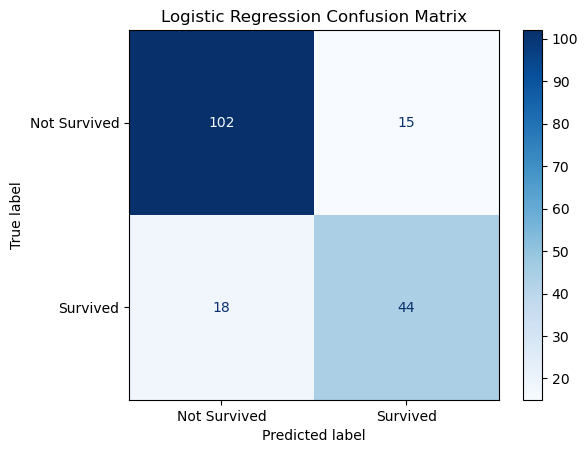

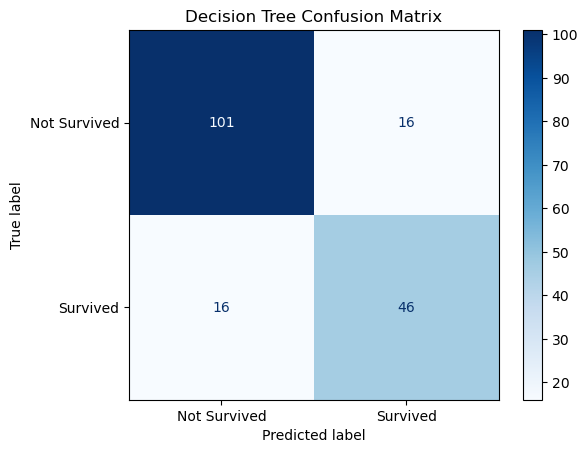

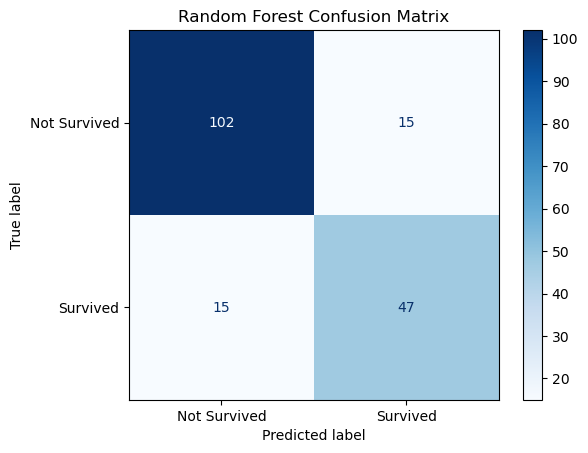

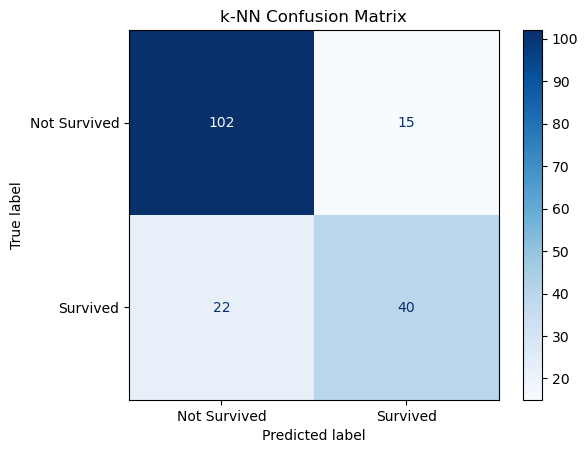

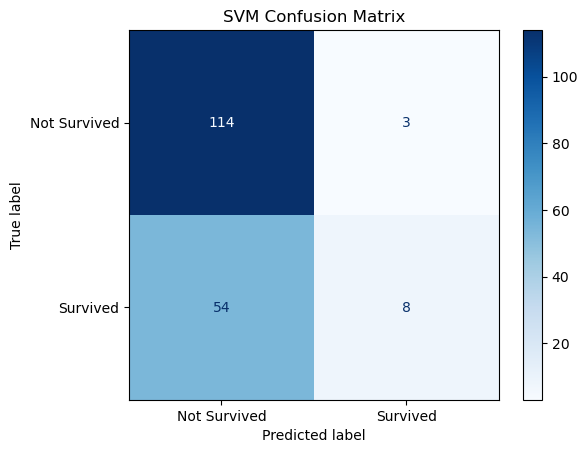

In [45]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(f'{name} Confusion Matrix')
    plt.show()


## Best Model
#### Random Forest is the best-performing model based on the following:
     - Highest Accuracy: 0.85
     - Highest F1-score: 0.89 (weighted avg)
     - Balanced Performance: Good precision and recall for both classes
     
### Random Forest performs well across all metrics, indicating it balances accuracy, precision, and recall effectively. This model is generally robust and effective for many classification tasks, including predicting survival on the Titanic dataset.


## Save the Model &  parameters

In [46]:
import pickle

In [47]:
feature_names = X_train.columns.tolist()
feature_names

['pclass',
 'age',
 'familysize',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'class_Second',
 'class_Third']

In [48]:
# Save feature names to a file
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

In [49]:
# Save the model to disk
with open('best_model_Titanic_dataset.pkl', 'wb') as file:
    pickle.dump(model_rfc, file)


## Test our model Before Deployment
    - define functions 

In [50]:
def preprocess_input(age, sex, pclass, embark_town, familysize):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'pclass': [pclass],
        'embark_town': [embark_town],
        'familysize': [familysize]
    })
    
    # Encode categorical variables with get_dummies
    input_data_encoded = pd.get_dummies(input_data)
    
    # Ensure the same columns as in training data
    for col in feature_names:
        if col not in input_data_encoded.columns:
            input_data_encoded[col] = 0
    input_data_encoded = input_data_encoded[feature_names]
    
    return input_data_encoded



In [51]:
def predict_survival(model_rfc, age, sex, pclass, embark_town, familysize):
    # Preprocess the input data
    processed_data = preprocess_input(age, sex, pclass,  embark_town, familysize)
    
    # Predict survival using the trained model
    prediction = model_rfc.predict(processed_data)
    
    # Return the prediction (0 for not survived, 1 for survived)
    return prediction[0]

In [52]:
# Sample input values
age = 22
sex = 'male'
pclass = 1
embark_town = 'Cherbourg'
familysize = 1

# Predict survival
survival_prediction = predict_survival(model_rfc, age, sex, pclass, embark_town, familysize)
print(f"Predicted survival: {'Survived' if survival_prediction == 1 else 'Not Survived'}")

Predicted survival: Not Survived


## Model Deployment

### Set Up Flask for Deployment
### Model Deployment File
     - Create a file called app.py (or a similar name) for Flask application:
